In [57]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [59]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

In [60]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [61]:
mean_std={}

# Remove target(Because the name of the car will hinder the training)
cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Standardization
x_columns = df.columns.drop('name')
for var in x_columns:
  mean_std[var]=(df[var].mean(), df[var].std())
  df[var] = (df[var] - df[var].mean()) / df[var].std()

# Pandas to Numpy
x = df[x_columns].values
y = df['acceleration'].values # regression

In [62]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,-0.705551,1.496308,1.089233,0.672271,0.630077,-1.293870,-1.625381,-0.714246,chevrolet chevelle malibu
1,-1.089379,1.496308,1.501624,1.587959,0.853259,-1.475181,-1.625381,-0.714246,buick skylark 320
2,-0.705551,1.496308,1.194728,1.195522,0.549778,-1.656492,-1.625381,-0.714246,plymouth satellite
3,-0.961437,1.496308,1.060461,1.195522,0.546236,-1.293870,-1.625381,-0.714246,amc rebel sst
4,-0.833494,1.496308,1.041280,0.933897,0.565130,-1.837804,-1.625381,-0.714246,ford torino


In [63]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Build the neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Hidden 1
model.add(Dense(25, activation='relu', kernel_initializer='random_normal')) # Hidden 2
model.add(Dense(1, kernel_initializer='random_normal')) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=100)

Epoch 1/100
10/10 - 0s - loss: 1.0273 - val_loss: 0.8692 - 445ms/epoch - 44ms/step
Epoch 2/100
10/10 - 0s - loss: 1.0010 - val_loss: 0.8371 - 62ms/epoch - 6ms/step
Epoch 3/100
10/10 - 0s - loss: 0.9554 - val_loss: 0.7793 - 59ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 0.8797 - val_loss: 0.6865 - 58ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 0.7607 - val_loss: 0.5557 - 43ms/epoch - 4ms/step
Epoch 6/100
10/10 - 0s - loss: 0.6099 - val_loss: 0.4152 - 42ms/epoch - 4ms/step
Epoch 7/100
10/10 - 0s - loss: 0.4582 - val_loss: 0.2937 - 69ms/epoch - 7ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3328 - val_loss: 0.1898 - 43ms/epoch - 4ms/step
Epoch 9/100
10/10 - 0s - loss: 0.2163 - val_loss: 0.1116 - 44ms/epoch - 4ms/step
Epoch 10/100
10/10 - 0s - loss: 0.1248 - val_loss: 0.0641 - 41ms/epoch - 4ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0699 - val_loss: 0.0419 - 41ms/epoch - 4ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0434 - val_loss: 0.0266 - 51ms/epoch - 5ms/step
Epoch 13/100
10/10 - 0s

In [64]:
def reverse_standardization(dict, data, col_name):
  return data * dict[col_name][1] + dict[col_name][0]

In [65]:
pred = model.predict(x_test)
print(reverse_standardization(mean_std, pred[0:10], 'acceleration')) # Reverse Standardization

[[16.514788 ]
 [14.0721655]
 [16.429972 ]
 [15.820957 ]
 [15.523779 ]
 [14.533701 ]
 [17.002499 ]
 [18.002735 ]
 [19.448717 ]
 [15.781528 ]]


In [66]:
# Measure MSE error.  MSE is common for regression.
score = metrics.mean_squared_error(pred,y_test)
print(f"Final score (MSE): {score}")

Final score (MSE): 0.000566027429290961


In [67]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 0.023791330969303946


In [68]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, Acceleration: {reverse_standardization(mean_std, y_test[i], 'acceleration')}, predicted Acceleration: {reverse_standardization(mean_std, pred[i], 'acceleration')}.")

1. Car name: chevrolet chevelle malibu, Acceleration: 16.5, predicted Acceleration: [16.514788].
2. Car name: buick skylark 320, Acceleration: 14.1, predicted Acceleration: [14.0721655].
3. Car name: plymouth satellite, Acceleration: 16.4, predicted Acceleration: [16.429972].
4. Car name: amc rebel sst, Acceleration: 15.8, predicted Acceleration: [15.820957].
5. Car name: ford torino, Acceleration: 15.5, predicted Acceleration: [15.523779].
6. Car name: ford galaxie 500, Acceleration: 14.5, predicted Acceleration: [14.533701].
7. Car name: chevrolet impala, Acceleration: 17.0, predicted Acceleration: [17.002499].
8. Car name: plymouth fury iii, Acceleration: 18.0, predicted Acceleration: [18.002735].
9. Car name: pontiac catalina, Acceleration: 19.4, predicted Acceleration: [19.448717].
10. Car name: amc ambassador dpl, Acceleration: 15.8, predicted Acceleration: [15.781528].


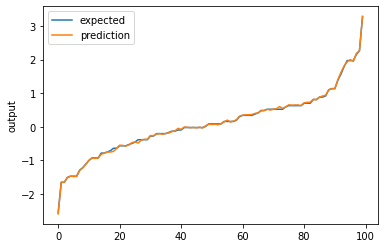

In [69]:
import matplotlib.pyplot as plt

# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)